## 영화 장르 분포 시각화 
#### - 드라마 : 35.1% 
#### - 액션 : 9.8 %
#### - 애니메이션 : 9.3%
#### - 코미디 : 9.2%
#### - 다큐멘터리 : 7.7%
#### - 멜로/로맨스 : 7.0%
####  전체의 77% 정도

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Windows 환경에 맞는 한글 폰트를 설정합니다.
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# --- 1. 데이터 불러오기 및 병합 ---

# 두 개의 CSV 파일을 DataFrame으로 불러옵니다.
boxoffice_df = pd.read_csv("C:/Users/yusse/OneDrive/바탕 화면/boxoffice_data.csv")
movie_info_df = pd.read_csv("C:/Users/yusse/OneDrive/바탕 화면/movie_info_data.csv")

# 영화 정보 데이터에서 중복된 제목을 제거하고 두 데이터를 병합합니다.
movie_info_unique_df = movie_info_df.drop_duplicates(subset='Movie_Title', keep='first')
merged_df = pd.merge(boxoffice_df, movie_info_unique_df, on='Movie_Title', how='left')



# --- 2. 날짜 데이터 처리 ---

# 날짜 관련 컬럼들을 datetime 형식으로 변환하고, 분석에 필요한 파생 변수를 생성합니다.
merged_df['Release_Date'] = pd.to_datetime(merged_df['Release_Date'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Release_Year'] = merged_df['Release_Date'].dt.year
merged_df['Release_Month'] = merged_df['Release_Date'].dt.month
merged_df['Day_of_Week'] = merged_df['Date'].dt.day_name()




C:\Users\yusse\AppData\Local\Temp\ipykernel_31468\973745880.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




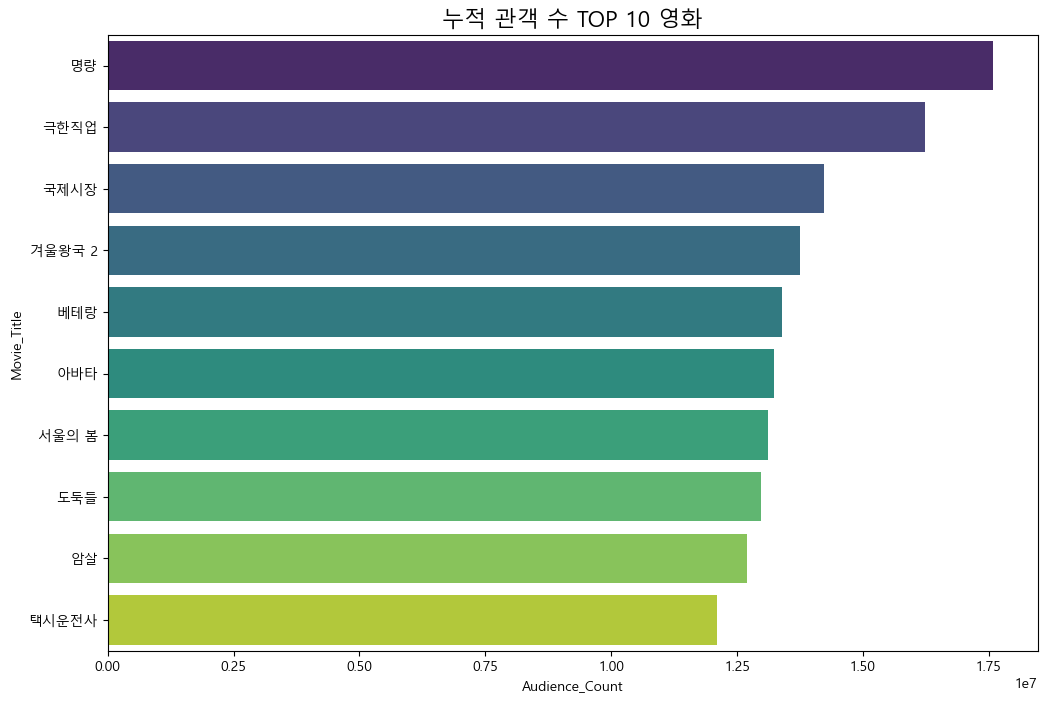

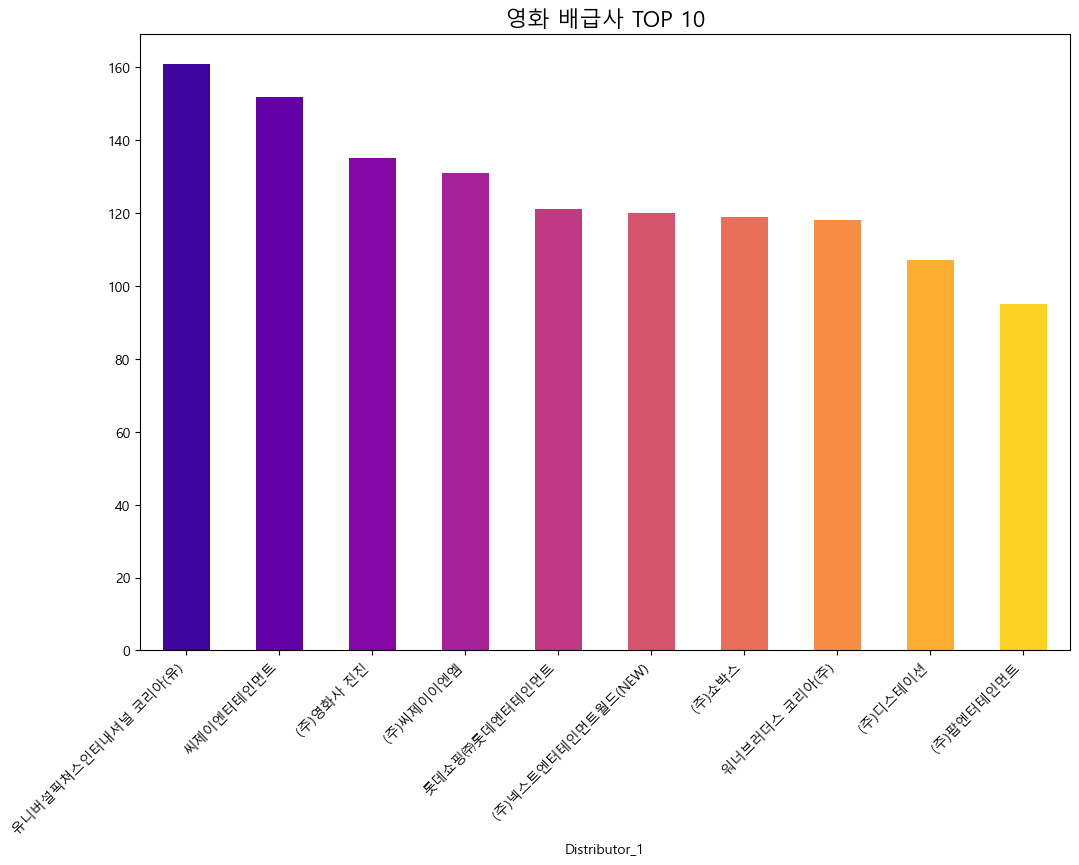

In [9]:

# --- 3. EDA 시각화 (Matplotlib & Seaborn) ---

# 1: 누적 관객 수 기준 TOP 10 영화
total_audience_df = boxoffice_df.groupby('Movie_Title')['Audience_Count'].sum().reset_index()
top_10_movies = total_audience_df.sort_values(by='Audience_Count', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Audience_Count', y='Movie_Title', data=top_10_movies, palette='viridis')
plt.title('누적 관객 수 TOP 10 영화', fontsize=16)
plt.show()

# 2: 배급 영화 수 기준 TOP 10 배급사
top_10_distributors = movie_info_df['Distributor_1'].value_counts().head(10)
plt.figure(figsize=(12, 8))
top_10_distributors.plot(kind='bar', color=sns.color_palette('plasma', 10))
plt.title('영화 배급사 TOP 10', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()




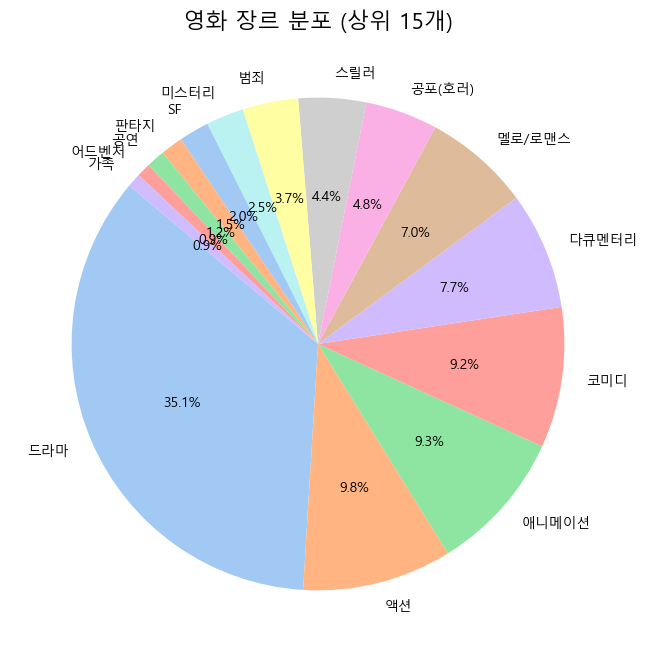

C:\Users\yusse\AppData\Local\Temp\ipykernel_31468\583319909.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




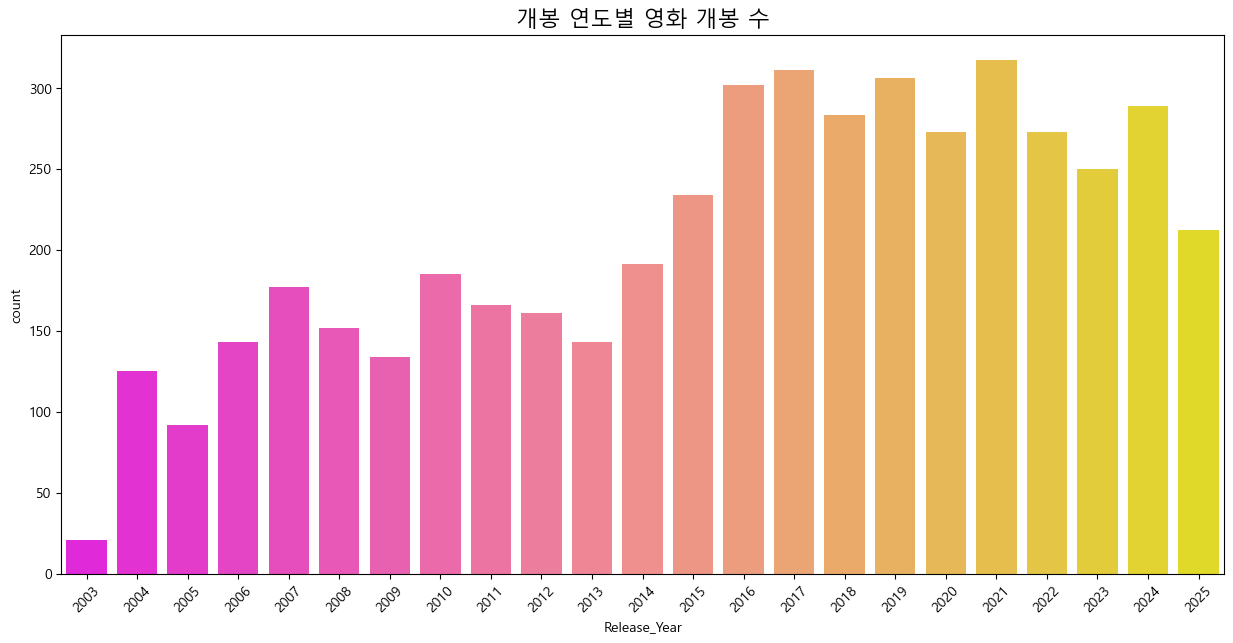

In [10]:

# 3: 상위 15개 영화 장르 분포
genre_counts = movie_info_df['genre1'].value_counts().head(15)
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('영화 장르 분포 (상위 15개)', fontsize=16)
plt.ylabel('')
plt.show()

# 4: 개봉 연도별 영화 개봉 수
plt.figure(figsize=(15, 7))
sns.countplot(x='Release_Year', data=merged_df.drop_duplicates(subset='Movie_Title'), palette='spring')
plt.title('개봉 연도별 영화 개봉 수', fontsize=16)
plt.xticks(rotation=45)
plt.show()


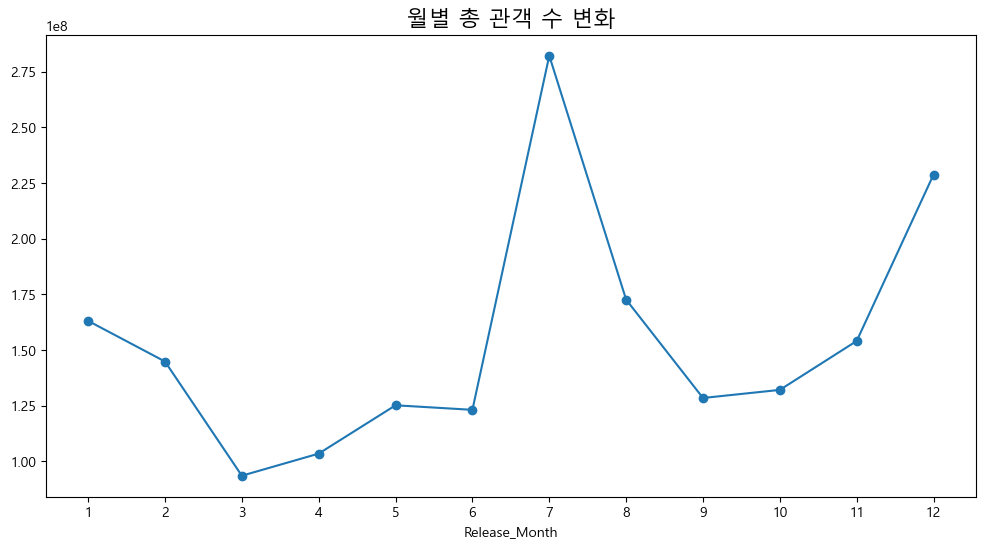

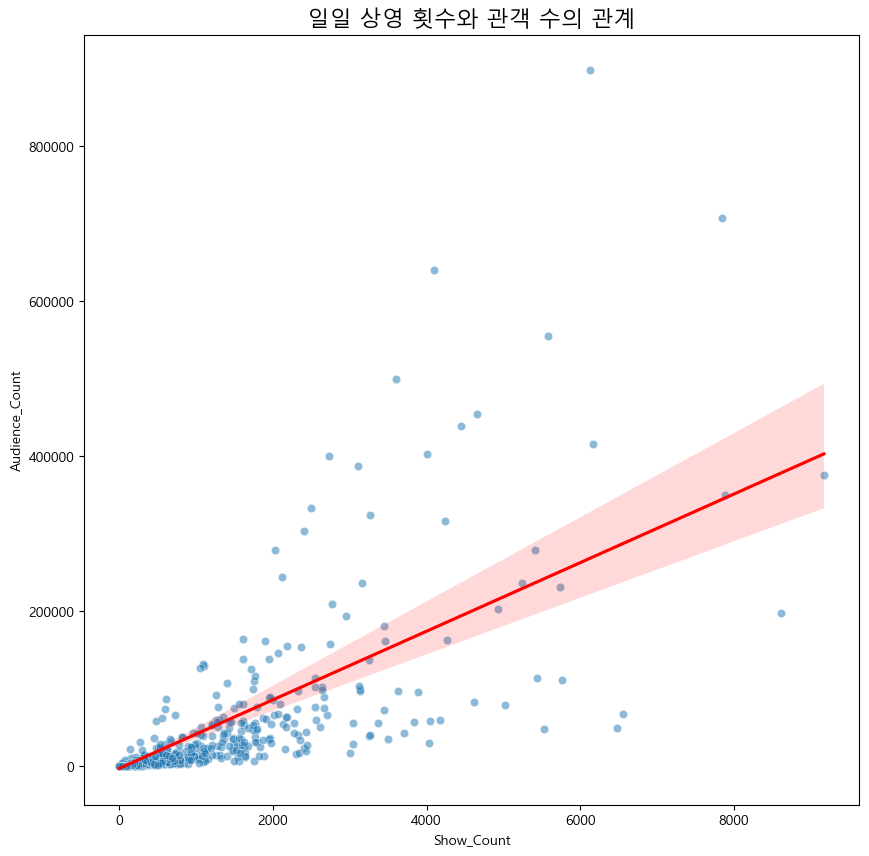

In [ ]:

# 6: 일일 상영 횟수와 관객 수의 관계
plt.figure(figsize=(10, 10))
sample_df = merged_df.sample(n=2000, random_state=42)
sns.scatterplot(x='Show_Count', y='Audience_Count', data=sample_df, alpha=0.5)
sns.regplot(x='Show_Count', y='Audience_Count', data=sample_df, scatter=False, color='red')
plt.title('일일 상영 횟수와 관객 수의 관계', fontsize=16)
plt.show()


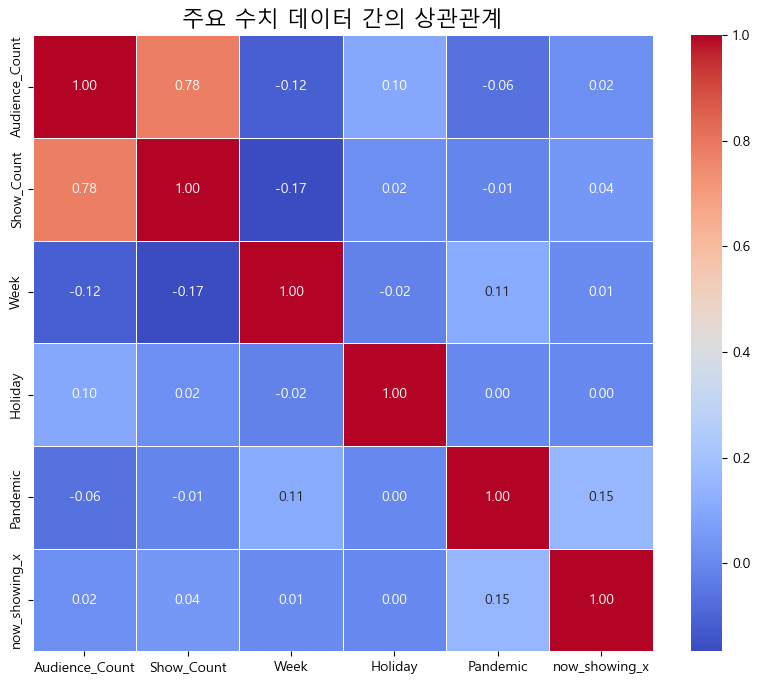

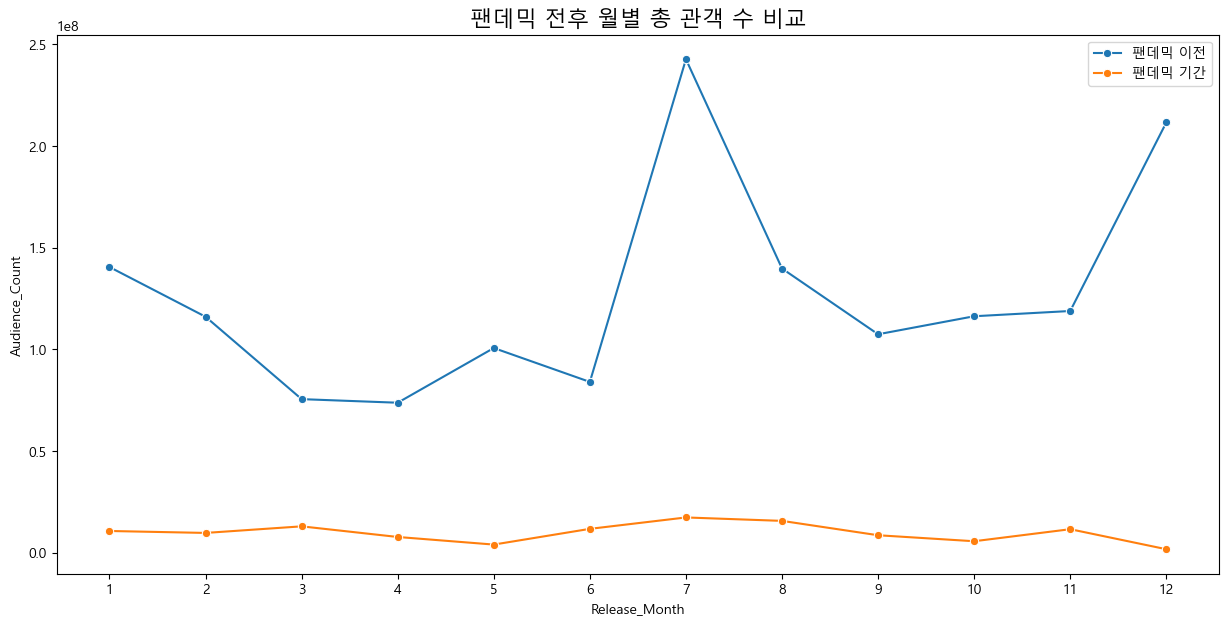

In [12]:

# 7: 주요 수치 데이터 간의 상관관계 히트맵
corr_df = merged_df[['Audience_Count', 'Show_Count', 'Week', 'Holiday', 'Pandemic', 'now_showing_x']]
correlation_matrix = corr_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('주요 수치 데이터 간의 상관관계', fontsize=16)
plt.show()

# 8: 팬데믹 전후 월별 관객 수 비교
plt.figure(figsize=(15, 7))
pre_pandemic_monthly = merged_df[merged_df['Pandemic'] == 0].groupby('Release_Month')['Audience_Count'].sum()
sns.lineplot(data=pre_pandemic_monthly, marker='o', label='팬데믹 이전')
pandemic_monthly = merged_df[merged_df['Pandemic'] == 1].groupby('Release_Month')['Audience_Count'].sum()
sns.lineplot(data=pandemic_monthly, marker='o', label='팬데믹 기간')
plt.title('팬데믹 전후 월별 총 관객 수 비교', fontsize=16)
plt.xticks(range(1, 13))
plt.legend()
plt.show()


C:\Users\yusse\AppData\Local\Temp\ipykernel_31468\2458732973.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




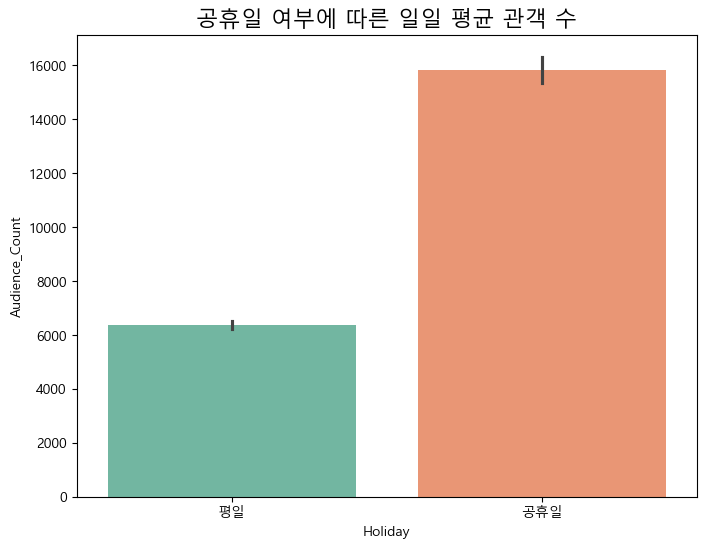

C:\Users\yusse\AppData\Local\Temp\ipykernel_31468\2458732973.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\yusse\AppData\Local\Temp\ipykernel_31468\2458732973.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

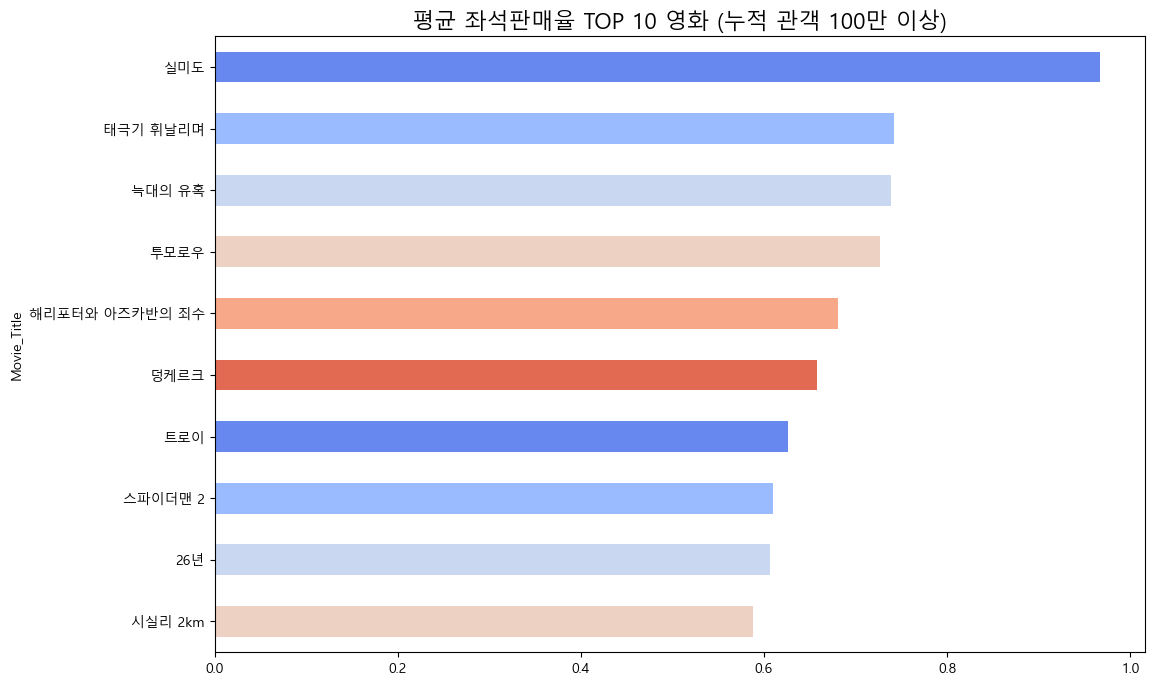

In [13]:

# 9: 공휴일과 평일의 평균 관객 수 비교
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Audience_Count', data=merged_df, palette='Set2')
plt.title('공휴일 여부에 따른 일일 평균 관객 수', fontsize=16)
plt.xticks([0, 1], ['평일', '공휴일'])
plt.show()

# 10: 파생 변수 '좌석판매율' 생성 및 분석
merged_df['Seat_Occupancy'] = merged_df['Audience_Count'] / (merged_df['Show_Count'] * 100)
merged_df['Seat_Occupancy'].replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df['Seat_Occupancy'].fillna(0, inplace=True)
total_audience_map = boxoffice_df.groupby('Movie_Title')['Audience_Count'].sum()
merged_df['Total_Audience'] = merged_df['Movie_Title'].map(total_audience_map)
high_audience_movies = merged_df[merged_df['Total_Audience'] > 1000000]
top_occupancy_movies = high_audience_movies.groupby('Movie_Title')['Seat_Occupancy'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_occupancy_movies.plot(kind='barh', color=sns.color_palette('coolwarm'))
plt.title('평균 좌석판매율 TOP 10 영화 (누적 관객 100만 이상)', fontsize=16)
plt.gca().invert_yaxis()
plt.show()


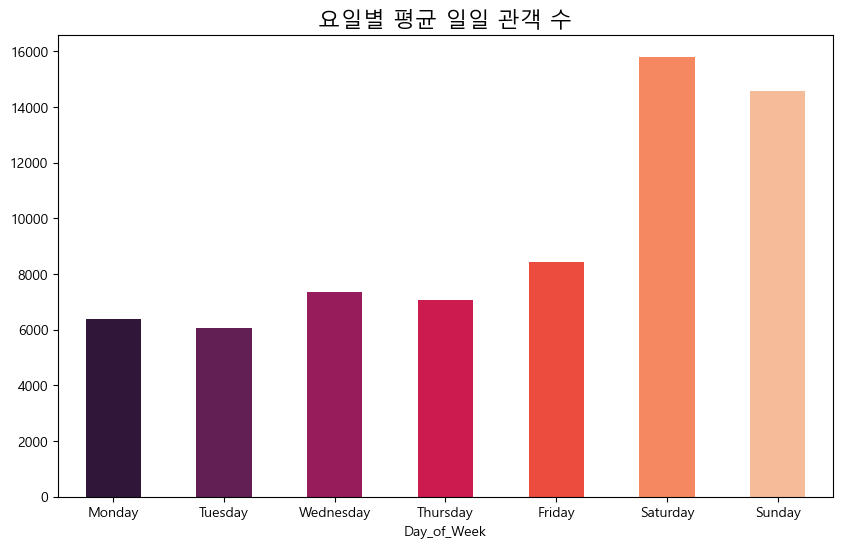

C:\Users\yusse\AppData\Local\Temp\ipykernel_31468\561972715.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




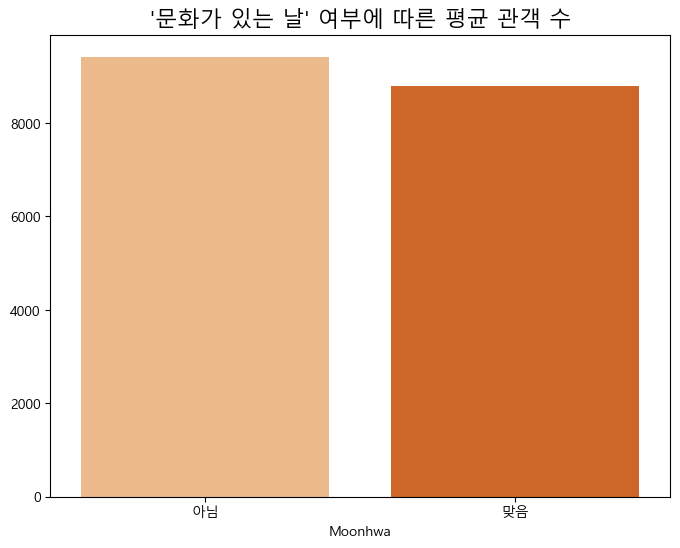

C:\Users\yusse\AppData\Local\Temp\ipykernel_31468\561972715.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




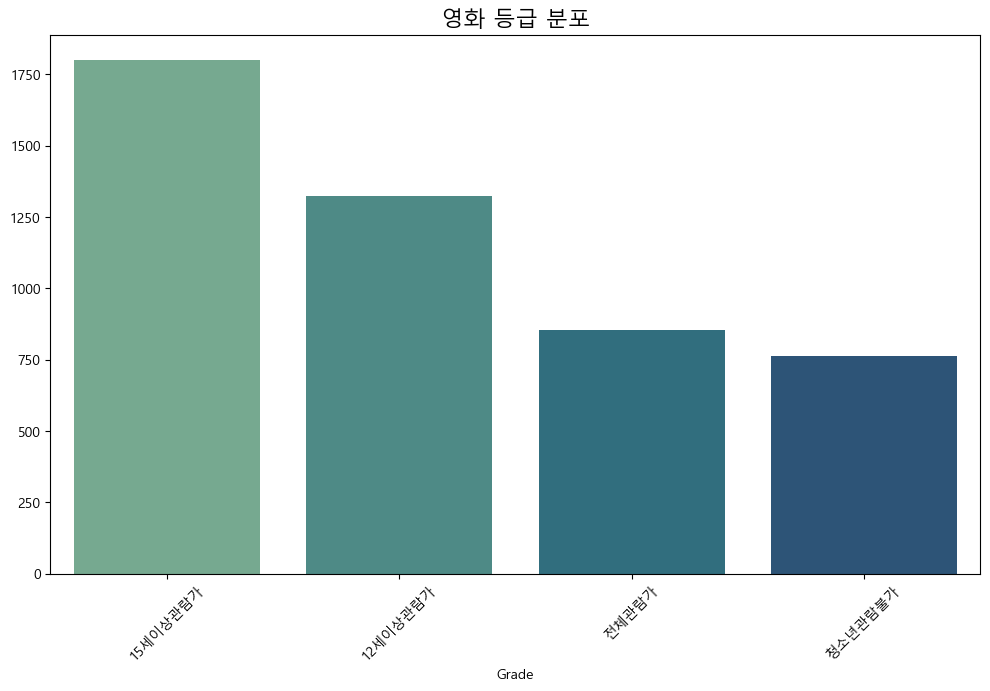

In [ ]:

# 11: 요일별 평균 관객 수
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_audience = merged_df.groupby('Day_of_Week')['Audience_Count'].mean().reindex(weekday_order)
plt.figure(figsize=(10, 6))
weekday_audience.plot(kind='bar', color=sns.color_palette('rocket', 7))
plt.title('요일별 평균 일일 관객 수', fontsize=16)
plt.xticks(rotation=0)
plt.show()

# 12: '문화가 있는 날' 효과 분석
moonhwa_audience = merged_df.groupby('Moonhwa')['Audience_Count'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=moonhwa_audience.index, y=moonhwa_audience.values, palette='Oranges')
plt.title("'문화가 있는 날' 여부에 따른 평균 관객 수", fontsize=16)
plt.xticks([0, 1], ['아님', '맞음'])
plt.show()

# 13: 영화 등급 분포
grade_counts = merged_df.drop_duplicates(subset='Movie_Title')['Grade'].value_counts()
plt.figure(figsize=(12, 7))

sns.barplot(x=grade_counts.index, y=grade_counts.values, palette='crest', order=grade_counts.index)
plt.title('영화 등급 분포', fontsize=16)
plt.xticks(rotation=45)
plt.show()

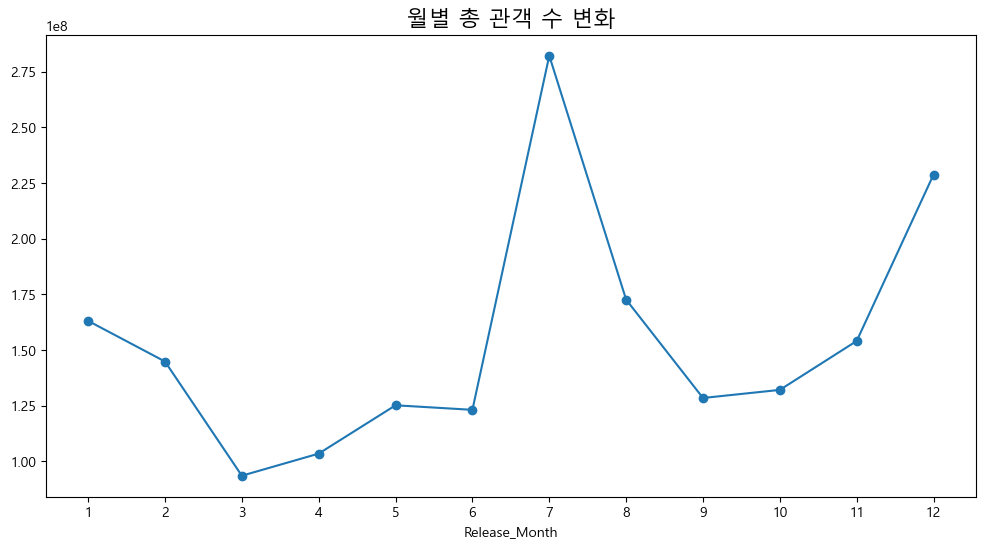

In [15]:


# 5: 월별 총 관객 수 변화
monthly_audience = merged_df.groupby('Release_Month')['Audience_Count'].sum()
plt.figure(figsize=(12, 6))
monthly_audience.plot(kind='line', marker='o', linestyle='-')
plt.title('월별 총 관객 수 변화', fontsize=16)
plt.xticks(range(1, 13))
plt.show()


# --- 4. 동적 시계열 분석 (Plotly) ---

# 연도와 월을 합친 'YearMonth' 컬럼 생성 (예: 2020-01)
if 'YearMonth' not in merged_df.columns:
    merged_df['YearMonth'] = merged_df['Date'].dt.to_period('M')

# 'YearMonth'를 기준으로 그룹화하여 월별 총 관객 수 계산
monthly_timeseries = merged_df.groupby('YearMonth')['Audience_Count'].sum().reset_index()

# 시각화에 용이하도록 Period 타입을 문자열로 변경
monthly_timeseries['YearMonth'] = monthly_timeseries['YearMonth'].astype(str)

# Plotly Express를 사용해 동적 시계열 그래프 생성
fig = px.line(
    monthly_timeseries, 
    x='YearMonth', 
    y='Audience_Count', 
    title='연도-월별 전체 관객 수 변화 추이 (Interactive)',
    markers=True, # 각 데이터 포인트에 마커 표시
    labels={'YearMonth': '날짜 (연-월)', 'Audience_Count': '총 관객 수 (명)'}
)
fig.update_layout(
    xaxis_title='날짜 (연-월)',
    yaxis_title='총 관객 수 (명)',
    title_font_size=20,
    xaxis_gridcolor='lightgrey',
    yaxis_gridcolor='lightgrey'
)
fig.update_xaxes(tickangle=45)
fig.show()



In [8]:

# --- 5. 5년 단위 동적 시계열 분석 (Plotly) ---

# 데이터가 있는 전체 연도 범위를 확인
years = pd.to_datetime(monthly_timeseries['YearMonth']).dt.year.unique()
start_year = years.min()
end_year = years.max()

# 5년 단위로 그래프 생성
for year in range(start_year, end_year + 1, 5):
    period_start = f"{year}-01"
    period_end = f"{year + 4}-12"
    
    # 해당 기간의 데이터 필터링
    period_df = monthly_timeseries[
        (monthly_timeseries['YearMonth'] >= period_start) & 
        (monthly_timeseries['YearMonth'] <= period_end)
    ]
    
    if period_df.empty:
        continue

    # Plotly Express를 사용해 동적 시계열 그래프 생성
    fig_period = px.line(
        period_df, 
        x='YearMonth', 
        y='Audience_Count', 
        title=f'{year} ~ {year + 4}년 월별 관객 수 변화 추이',
        markers=True,
        labels={'YearMonth': '날짜 (연-월)', 'Audience_Count': '총 관객 수 (명)'}
    )
    fig_period.update_layout(
        xaxis_title='날짜 (연-월)',
        yaxis_title='총 관객 수 (명)',
        title_font_size=20
    )
    fig_period.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Windows 환경에 맞는 한글 폰트를 설정합니다.
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# --- 1. 데이터 불러오기 및 병합 ---

# 두 개의 CSV 파일을 DataFrame으로 불러옵니다.
boxoffice_df = pd.read_csv("C:/Users/yusse/OneDrive/바탕 화면/boxoffice_data.csv")
movie_info_df = pd.read_csv("C:/Users/yusse/OneDrive/바탕 화면/movie_info_data.csv")

# 영화 정보 데이터에서 중복된 제목을 제거하고 두 데이터를 병합합니다.
movie_info_unique_df = movie_info_df.drop_duplicates(subset='Movie_Title', keep='first')
merged_df = pd.merge(boxoffice_df, movie_info_unique_df, on='Movie_Title', how='left')


# --- 2. 날짜 데이터 처리 ---

# 날짜 관련 컬럼들을 datetime 형식으로 변환하고, 분석에 필요한 파생 변수를 생성합니다.
merged_df['Release_Date'] = pd.to_datetime(merged_df['Release_Date'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Release_Year'] = merged_df['Release_Date'].dt.year
merged_df['Release_Month'] = merged_df['Release_Date'].dt.month
merged_df['Day_of_Week'] = merged_df['Date'].dt.day_name()


# --- 3. EDA 시각화 (Matplotlib & Seaborn) ---

# 1: 누적 관객 수 기준 TOP 10 영화
total_audience_df = boxoffice_df.groupby('Movie_Title')['Audience_Count'].sum().reset_index()
top_10_movies = total_audience_df.sort_values(by='Audience_Count', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Audience_Count', y='Movie_Title', data=top_10_movies, palette='viridis')
plt.title('누적 관객 수 TOP 10 영화', fontsize=16)
plt.show()

# 2: 배급 영화 수 기준 TOP 10 배급사
top_10_distributors = movie_info_df['Distributor_1'].value_counts().head(10)
plt.figure(figsize=(12, 8))
top_10_distributors.plot(kind='bar', color=sns.color_palette('plasma', 10))
plt.title('영화 배급사 TOP 10', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

# 3: 상위 15개 영화 장르 분포
genre_counts = movie_info_df['genre1'].value_counts().head(15)
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('영화 장르 분포 (상위 15개)', fontsize=16)
plt.ylabel('')
plt.show()

# 4: 개봉 연도별 영화 개봉 수
plt.figure(figsize=(15, 7))
sns.countplot(x='Release_Year', data=merged_df.drop_duplicates(subset='Movie_Title'), palette='spring')
plt.title('개봉 연도별 영화 개봉 수', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# 5: 월별 총 관객 수 변화
monthly_audience = merged_df.groupby('Release_Month')['Audience_Count'].sum()
plt.figure(figsize=(12, 6))
monthly_audience.plot(kind='line', marker='o', linestyle='-')
plt.title('월별 총 관객 수 변화', fontsize=16)
plt.xticks(range(1, 13))
plt.show()

# 6: 일일 상영 횟수와 관객 수의 관계
plt.figure(figsize=(10, 10))
sample_df = merged_df.sample(n=2000, random_state=42)
sns.scatterplot(x='Show_Count', y='Audience_Count', data=sample_df, alpha=0.5)
sns.regplot(x='Show_Count', y='Audience_Count', data=sample_df, scatter=False, color='red')
plt.title('일일 상영 횟수와 관객 수의 관계', fontsize=16)
plt.show()

# 7: 주요 수치 데이터 간의 상관관계 히트맵
corr_df = merged_df[['Audience_Count', 'Show_Count', 'Week', 'Holiday', 'Pandemic', 'now_showing_x']]
correlation_matrix = corr_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('주요 수치 데이터 간의 상관관계', fontsize=16)
plt.show()

# 8: 팬데믹 전후 월별 관객 수 비교
plt.figure(figsize=(15, 7))
pre_pandemic_monthly = merged_df[merged_df['Pandemic'] == 0].groupby('Release_Month')['Audience_Count'].sum()
sns.lineplot(data=pre_pandemic_monthly, marker='o', label='팬데믹 이전')
pandemic_monthly = merged_df[merged_df['Pandemic'] == 1].groupby('Release_Month')['Audience_Count'].sum()
sns.lineplot(data=pandemic_monthly, marker='o', label='팬데믹 기간')
plt.title('팬데믹 전후 월별 총 관객 수 비교', fontsize=16)
plt.xticks(range(1, 13))
plt.legend()
plt.show()

# 9: 공휴일과 평일의 평균 관객 수 비교
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Audience_Count', data=merged_df, palette='Set2')
plt.title('공휴일 여부에 따른 일일 평균 관객 수', fontsize=16)
plt.xticks([0, 1], ['평일', '공휴일'])
plt.show()

# 10: 파생 변수 '좌석판매율' 생성 및 분석
merged_df['Seat_Occupancy'] = merged_df['Audience_Count'] / (merged_df['Show_Count'] * 100)
merged_df['Seat_Occupancy'].replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df['Seat_Occupancy'].fillna(0, inplace=True)
total_audience_map = boxoffice_df.groupby('Movie_Title')['Audience_Count'].sum()
merged_df['Total_Audience'] = merged_df['Movie_Title'].map(total_audience_map)
high_audience_movies = merged_df[merged_df['Total_Audience'] > 1000000]
top_occupancy_movies = high_audience_movies.groupby('Movie_Title')['Seat_Occupancy'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_occupancy_movies.plot(kind='barh', color=sns.color_palette('coolwarm'))
plt.title('평균 좌석판매율 TOP 10 영화 (누적 관객 100만 이상)', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

# 11: 요일별 평균 관객 수
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_audience = merged_df.groupby('Day_of_Week')['Audience_Count'].mean().reindex(weekday_order)
plt.figure(figsize=(10, 6))
weekday_audience.plot(kind='bar', color=sns.color_palette('rocket', 7))
plt.title('요일별 평균 일일 관객 수', fontsize=16)
plt.xticks(rotation=0)
plt.show()

# 12: '문화가 있는 날' 효과 분석
moonhwa_audience = merged_df.groupby('Moonhwa')['Audience_Count'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=moonhwa_audience.index, y=moonhwa_audience.values, palette='Oranges')
plt.title("'문화가 있는 날' 여부에 따른 평균 관객 수", fontsize=16)
plt.xticks([0, 1], ['아님', '맞음'])
plt.show()

# 13: 영화 등급 분포
grade_counts = merged_df.drop_duplicates(subset='Movie_Title')['Grade'].value_counts()
plt.figure(figsize=(12, 7))
sns.barplot(x=grade_counts.index, y=grade_counts.values, palette='crest', order=grade_counts.index)
plt.title('영화 등급 분포', fontsize=16)
plt.xticks(rotation=45)
plt.show()


# --- 4. 동적 시계열 분석 (Plotly) ---

# 연도와 월을 합친 'YearMonth' 컬럼 생성 (예: 2020-01)
if 'YearMonth' not in merged_df.columns:
    merged_df['YearMonth'] = merged_df['Date'].dt.to_period('M')

# 'YearMonth'를 기준으로 그룹화하여 월별 총 관객 수 계산
monthly_timeseries = merged_df.groupby('YearMonth')['Audience_Count'].sum().reset_index()

# 시각화에 용이하도록 Period 타입을 문자열로 변경
monthly_timeseries['YearMonth'] = monthly_timeseries['YearMonth'].astype(str)

# Plotly Express를 사용해 동적 시계열 그래프 생성
fig = px.line(
    monthly_timeseries, 
    x='YearMonth', 
    y='Audience_Count', 
    title='연도-월별 전체 관객 수 변화 추이 (Interactive)',
    markers=True, # 각 데이터 포인트에 마커 표시
    labels={'YearMonth': '날짜 (연-월)', 'Audience_Count': '총 관객 수 (명)'}
)
fig.update_layout(
    xaxis_title='날짜 (연-월)',
    yaxis_title='총 관객 수 (명)',
    title_font_size=20,
    xaxis_gridcolor='lightgrey',
    yaxis_gridcolor='lightgrey'
)
fig.update_xaxes(tickangle=45)
fig.show()


# --- 5. 5년 단위 동적 시계열 분석 (Plotly) ---

# 데이터가 있는 전체 연도 범위를 확인
years = pd.to_datetime(monthly_timeseries['YearMonth']).dt.year.unique()
start_year = years.min()
end_year = years.max()

# 5년 단위로 그래프 생성
for year in range(start_year, end_year + 1, 5):
    period_start = f"{year}-01"
    period_end = f"{year + 4}-12"
    
    # 해당 기간의 데이터 필터링
    period_df = monthly_timeseries[
        (monthly_timeseries['YearMonth'] >= period_start) & 
        (monthly_timeseries['YearMonth'] <= period_end)
    ]
    
    if period_df.empty:
        continue

    # Plotly Express를 사용해 동적 시계열 그래프 생성
    fig_period = px.line(
        period_df, 
        x='YearMonth', 
        y='Audience_Count', 
        title=f'{year} ~ {year + 4}년 월별 관객 수 변화 추이',
        markers=True,
        labels={'YearMonth': '날짜 (연-월)', 'Audience_Count': '총 관객 수 (명)'}
    )
    fig_period.update_layout(
        xaxis_title='날짜 (연-월)',
        yaxis_title='총 관객 수 (명)',
        title_font_size=20
    )
    fig_period.show()

